# Namibian power network in pypsa-earth

This notebook produces network plot for Namibia

In [2]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
from shapely.validation import make_valid
import matplotlib.lines as mlines

Required files:
- Electricity network found in "networks" directory.
- Shape file for namibia, found in "resources/shape" directory

In [4]:
presec = pypsa.Network("../../sandbox-cs/pypsa-earth-sec/results/MT_opt30/prenetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.076_NZ_0export.nc")
elec = pypsa.Network("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/networks/elec.nc")

regions_onshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/gadm_shapes.geojson")
regions_offshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/offshore_shapes.geojson")
substations_OSMclean_path = "../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/osm/clean/all_clean_substations.geojson"

lines_OSMclean_path = "../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/osm/clean/all_clean_lines.geojson"
powerplants = "../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/powerplants.csv"

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_3H_2030_0.076_NZ_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, transformers


In [5]:
# clean substations data
df_substations_clean_osm_africa = gpd.read_file(substations_OSMclean_path)
df_substations_clean_osm_africa["geometry"] = (
    df_substations_clean_osm_africa["geometry"].apply(make_valid).to_crs(epsg=3857)
)
df_substations_clean_osm_namibia = df_substations_clean_osm_africa[
    df_substations_clean_osm_africa.country == "NA"
]

# clean lines data
df_lines_clean_osm_africa = gpd.read_file(lines_OSMclean_path)
df_lines_clean_osm_africa["geometry"] = (
    df_lines_clean_osm_africa["geometry"].apply(make_valid).to_crs(epsg=3857)
)
df_lines_clean_osm_namibia = df_lines_clean_osm_africa[
    df_lines_clean_osm_africa.country == "NA"
]

In [9]:
df = pd.read_csv("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/resources/custom_data/Existing_projects_na.csv", keep_default_na=False,
        na_values=[""])
geometry = gpd.points_from_xy(df.y, df.x)
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

[-3.03434e+00  4.35283e+03  8.70000e+03] 0    8700.00
1      25.00
2      15.10
3       7.63
4       5.66
Name: Project Value, dtype: float64


/tmp/ipykernel_1340582/395869727.py:37: RuntimeWarning: invalid value encountered in sqrt
  markersize=np.sqrt(b),


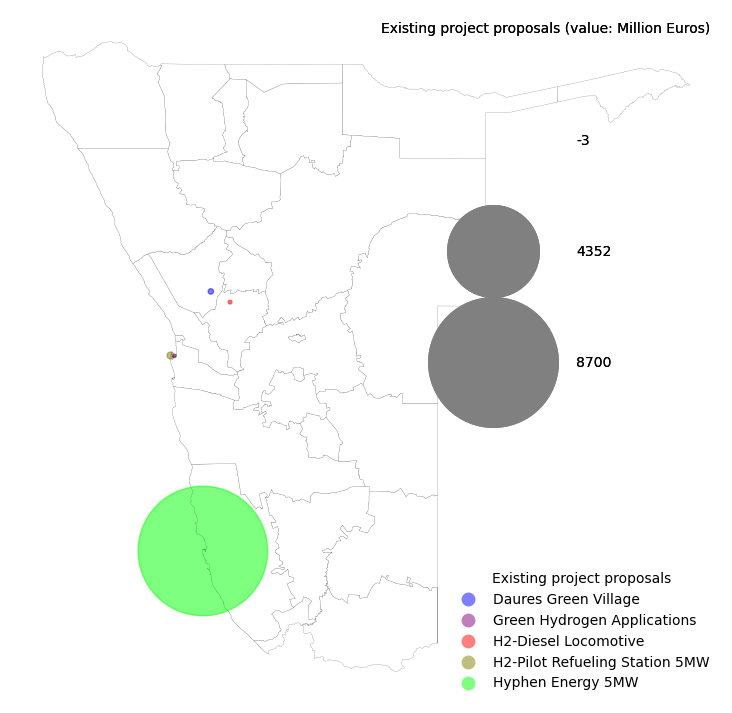

In [40]:
#plot gens
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=4326).plot(
                                        ax=ax, 
                                        color="white", 
                                        edgecolor="black", 
                                        linewidth=0.1)
markersize = geo_df['Project Value'].astype(float)*1e-6

geo_df.to_crs(epsg=4326).plot(
                                ax=ax,
                                column='Project',
                                alpha=0.5,
                                markersize=markersize, legend=True,
                                cmap="brg",
                                legend_kwds={'loc': "lower right", "frameon": False,"title": "Existing project proposals"}
                                )
ax.set_axis_off()    

# need to add existing legend back
leg1 = ax.get_legend()

# some bins to indicate size in legend
_, bins = pd.cut(markersize, bins=2, precision=0, retbins=True,include_lowest=True )
print(bins, markersize)
# create second legend
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="gray",
                lw=0,
                marker="o",
                markersize=np.sqrt(b),
                label=str(int(b)),
            )
            for i, b in enumerate(bins)
        ],
        loc="upper right",
        title= "Existing project proposals (value: Million Euros)",
        labelspacing=7.0,
        handletextpad=5,
        frameon=False
    )
)
# restore original legend
ax.add_artist(leg1)

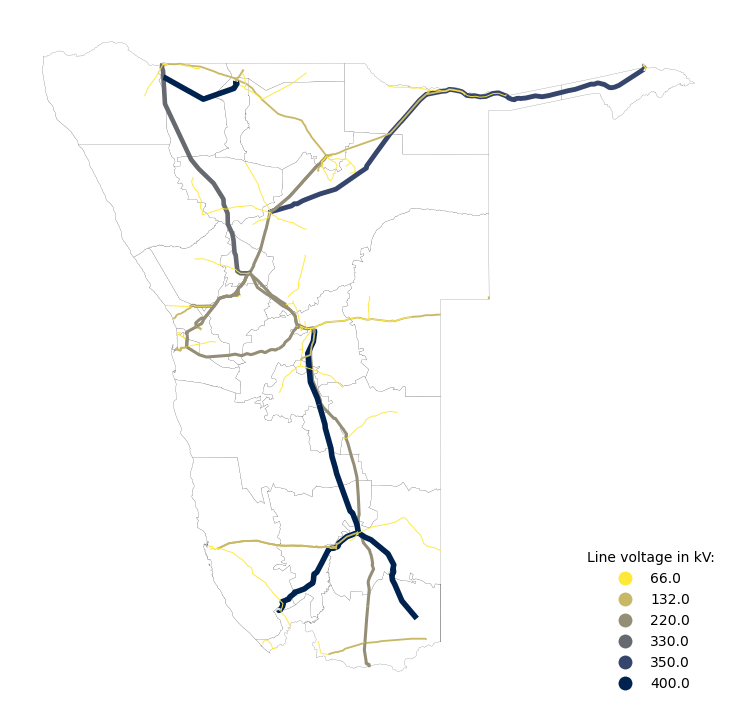

In [6]:
#plot lines
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=3857).plot(ax=ax, color="white", edgecolor="black", linewidth=0.1)
df_lines_clean_osm_namibia["voltage_kv"] = df_lines_clean_osm_namibia["voltage"]/1000
df_lines_clean_osm_namibia.to_crs(epsg=3857).plot(
                                                ax=ax,
                                                column='voltage_kv',
                                                linewidth= df_lines_clean_osm_namibia.voltage /100000,
                                                #alpha=0.8,
                                                categorical=True,
                                                cmap='cividis_r',
                                                legend=True,
                                                legend_kwds={'loc':'lower right', 'title':'Line voltage in kV:', "frameon": False}
                                                )
                                                

ax.set_axis_off()                                               
#plt.savefig('./outputs/osm_clean_power_grid.png')                 

In [7]:
df = pd.read_csv(powerplants, keep_default_na=False,
        na_values=[""])
geometry = gpd.points_from_xy(df.lon, df.lat)
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
#geo_df.head()

[  97.96220852  779.26382608 1458.52765216 2137.79147825] 0     237.141887
1    2137.791478
2    1106.324348
3     243.000000
4     100.000000
Name: Capacity, dtype: float64


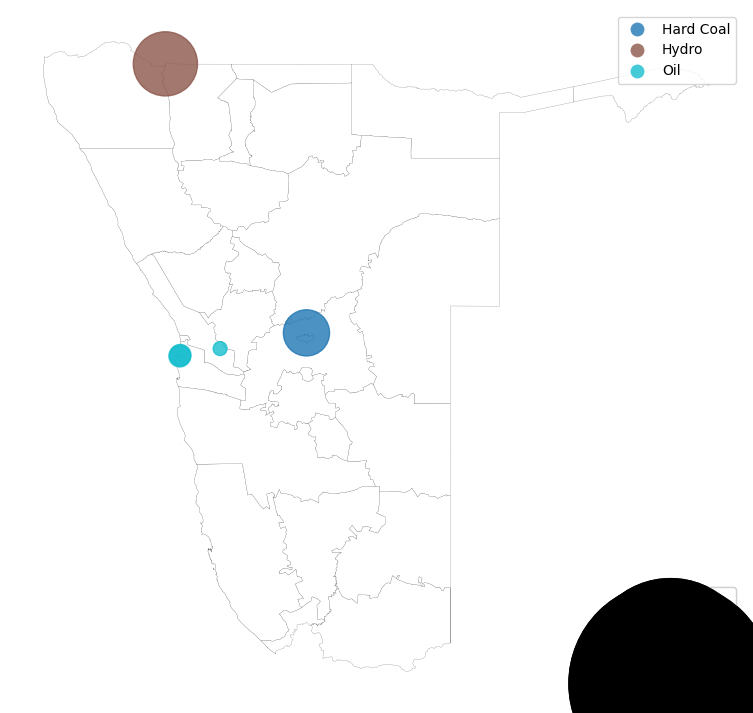

In [8]:
#plot gens
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=4326).plot(
                                        ax=ax, 
                                        color="white", 
                                        edgecolor="black", 
                                        linewidth=0.1)
markersize = geo_df['Capacity']*10

geo_df.to_crs(epsg=4326).plot(
                                ax=ax,
                                column='Fueltype',
                                alpha=0.8,
                                markersize=markersize, legend=True
                                )
ax.set_axis_off()    

# need to add existing legend back
leg1 = ax.get_legend()

# some bins to indicate size in legend
_, bins = pd.cut(markersize, bins=3, precision=3, retbins=True)
print(bins, markersize)
# create second legend
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="black",
                lw=0,
                marker="o",
                markersize=np.sqrt(b*10),
                label=str(int(b)),
            )
            for i, b in enumerate(bins)
        ],
        loc=4,
        title= "Capacity",
        
    )
)
# restore original legend
ax.add_artist(leg1)

In [9]:
#bus_scale = 5e3 
#line_scale = 3e3
bus_scale = 9e1 
line_scale = 1e3

In [10]:

def plot_network(n, line=False, fn=None):
    fig, ax = plt.subplots(figsize=(17, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    gen = n.generators.groupby(["bus", "carrier"]).p_nom.sum()
    sto = n.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
    buses = pd.concat([gen, sto])
    lines=0; links=0;
    if line:
        lines = n.lines.s_nom / line_scale
        links=n.links.p_nom / line_scale,
    ax.add_geometries(regions_onshore['geometry'], facecolor='white', edgecolor='black', crs=ccrs.PlateCarree())
    with plt.rc_context({"patch.linewidth": 0.}):
        n.plot(
            bus_sizes=buses / bus_scale,
            bus_alpha=0.9,
            line_widths=lines,#n.lines.s_nom / line_scale,
            link_widths=links,#n.links.p_nom / line_scale,
            line_colors="teal",
            ax=ax,
            margin=0.2,
            color_geomap=True,
        )
    regions_onshore.plot(
        ax=ax,
        facecolor="white",
        edgecolor="black",
        aspect="equal",
        transform=ccrs.PlateCarree(),
        linewidth=0,
    )
    regions_offshore.plot(
        ax=ax,
        facecolor="blue",
        edgecolor="blue",
        aspect="equal",
        transform=ccrs.PlateCarree(),
        linewidth=1,
    )
    #ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    legend_kwargs = {"loc": "upper left", "frameon": False}
    # circles legend may requite some fine-tuning
    legend_circles_dict = {"bbox_to_anchor": (1, 1.1), "labelspacing":11, "handletextpad":7, "title":"Capacity", **legend_kwargs}
    #bus_sizes = [5000, 10e3]  # in MW
    bus_sizes = [10, 100, 500]  # in MW
    line_sizes = [1000, 3000]  # in MW
    add_legend_circles(
        ax,
        [s / bus_scale for s in bus_sizes],
        [f"{s} MW" for s in bus_sizes],
        legend_kw=legend_circles_dict,    
    )
    if line:
        add_legend_lines(
            ax,
            [s / line_scale for s in line_sizes],
            [f"{s / 1000} GW" for s in line_sizes],
            legend_kw={"bbox_to_anchor": (1, 1.0), "handletextpad":7, **legend_kwargs},
        )
    add_legend_patches(
        ax,
        n.carriers.color,
        n.carriers.nice_name,
        legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left", "handletextpad":1.5, "title":"Technology",},
    )
    fig.tight_layout()
#fig.savefig("brownfield_capacities_" + country_code + ".png", bbox_inches="tight", dpi=300)


In [1]:

plot_network(presec)

NameError: name 'plot_network' is not defined

In [2]:
plot_network(n_30, True)

NameError: name 'plot_network' is not defined

In [ ]:
#open lines in simclustered network
#' average length of the lines'
n_30.lines.length.mean()


164.98096591459552

## 2. Energy production shares

In the following, the total energy production shares as output of the total energy dispatch as available by IEA are compared to those calculated by the pypsa-earth procedure.

The following image depicts the energy demand by source as computed in the Stated Policy Scenarios by [IEA](https://www.iea.org/countries/namibia), which is used as a reference for comparison purposes

- Coal	 :   56 GWh 
- Oil	 :   9 GWh 
- Wind : 18 GWh
- Hydro	 :  1505 GWh 
- Solar PV : 369 GWh 

In [ ]:
# filter only generators in Namibia
def gen_per_carrier(n, fn=None):
    namibia_generators_dispatch = n.generators_t.p.filter(regex="NA *", axis=1).copy()
    # rename column to keep only the carrier 
    namibia_generators_dispatch.rename( 
        columns=dict( 
            zip( 
                namibia_generators_dispatch.columns, 
                map( 
                    lambda x: re.sub(r"NA \d+ ", "", x), namibia_generators_dispatch.columns
                    ), ) ), inplace=True,)
                    
    # obtain generation by carrier
    ( 
        namibia_generators_dispatch.groupby(level=0, axis=1).sum().sum() *  8760/ 
        namibia_generators_dispatch.shape[0]
        / 1000).head(5)
        
    # create empty DataFrame with specific column names & types
    df = pd.DataFrame( 
        { "carrier": pd.Series(dtype="str"), 
        "Generation [GWh]": pd.Series(dtype="float"), 
        "sources": pd.Series(dtype="str") })
        
    carrier_list = n.generators.carrier.unique()
        
    for i in range(0, len(carrier_list)): 
        if carrier_list[i] != "load":
            df.loc[i] = [ carrier_list[i], round( n.generators_t.p.filter(like=carrier_list[i], axis=1).sum().sum()
            / 1000, 2, ), "pypsa 2020"
            ]
        # MWh to GWh 
        
    iea_gen = pd.DataFrame()

    iea_gen['carrier'] = ["onwind" ,"solar", "oil", "coal", "ror"]
    iea_gen['Generation [GWh]'] = [18, 369, 9, 56, 1505]
    iea_gen['sources'] = "IEA 2020"
    all_gen = pd.concat([df,iea_gen])
    print(all_gen)
    #all_gen.rename(columns={"gen_iea_GWh": "capacity [GW]"}, inplace=True)
    ax = sns.catplot(
     x="carrier",
    y="Generation [GWh]",
    hue="sources",
    data=all_gen,
        palette="Blues_d",
        kind="bar",
        height=10,
        aspect=1.5,)
    ax.set_xticklabels(rotation=90)
        
    sns.move_legend(
            ax, "upper right", bbox_to_anchor=(0.75, 0.94), frameon=True, title=None)
    sns.despine(left=True, bottom=False)
    ax.set(xlabel=None, ylabel="Generation [GWh]", ylim=(0, 3000))

  carrier  Generation [GWh]     sources
0  onwind               0.0  pypsa 2020
1   solar               0.0  pypsa 2020
2     oil               0.0  pypsa 2020
3    coal               0.0  pypsa 2020
4     ror               0.0  pypsa 2020
0  onwind              18.0    IEA 2020
1   solar             369.0    IEA 2020
2     oil               9.0    IEA 2020
3    coal              56.0    IEA 2020
4     ror            1505.0    IEA 2020


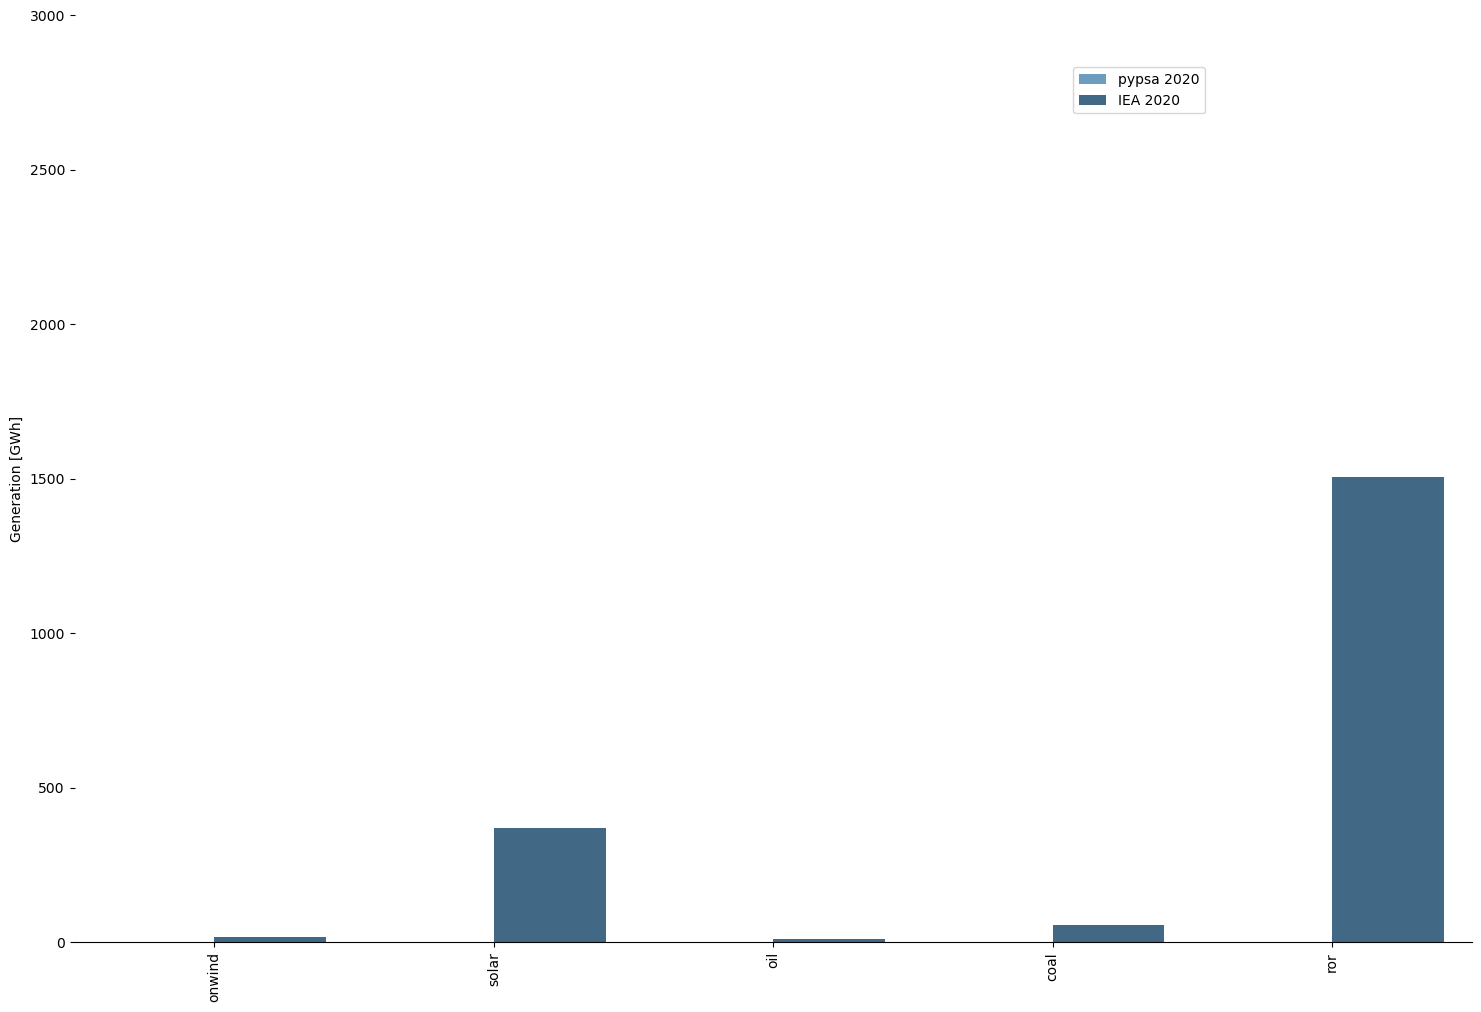

In [ ]:
gen_2030 = gen_per_carrier(n_30)

In [ ]:
generators = n_elec.generators
print(generators.columns)
generators = gpd.GeoDataFrame(generators, geometry=gpd.points_from_xy(generators.lon, generators.lat))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
regions_onshore.plot(ax=ax, color="white", edgecolor="black", linewidth=0.3)
for carrier, data in generators.groupby('carrier'):
    color = fuel_to_color[carrier]

    data.plot(ax=ax,
            #column='carrier',
            markersize=data.p_nom / 10,
            color=color,
            alpha=0.7,
            label = carrier,
            # legend=True
            )
legend = ax.legend(frameon=True, loc=3)
for legend_handle in legend.legendHandles:
    legend_handle._sizes = [10]

generators_visible = generators.loc[generators.p_nom > 10]
_, bins = pd.cut(generators_visible.p_nom/10, bins=3, precision=0, retbins=True)
#bins[0] = generators.p_nom.min() / 10
ax.add_artist(
    ax.legend(
            borderpad=1,
            handles=[
            mlines.Line2D(
                [],
                [],
                color='black',
                lw=0,
                marker='o',
                markersize=np.sqrt(b),
                label=str(round(b*10))+' MW',
            )
            for i, b in enumerate(bins)
        ],
        loc=4,
        labelspacing=2
    )
)

ax.add_artist(legend)
ax.set_axis_off()
plt.savefig('./outputs/generator_map_pre_opt.png')

Index(['carrier', 'bus', 'p_nom_min', 'p_nom', 'p_nom_extendable',
       'efficiency', 'marginal_cost', 'capital_cost', 'build_year', 'lifetime',
       'p_nom_max', 'weight', 'control', 'type', 'p_min_pu', 'p_max_pu',
       'p_set', 'q_set', 'sign', 'committable', 'start_up_cost',
       'shut_down_cost', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down', 'p_nom_opt'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'lon'